<a href="https://colab.research.google.com/github/PurvaChiniya/Effects-of-image-quality-on-deep-nueral-network-paper-code/blob/master/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARIES

In [39]:
from google.colab import drive
drive.mount('/content/drive')
zipfile='/content/drive/My Drive/proposal/ILSVRC2012_img_val.zip'
from zipfile import ZipFile
#with ZipFile('/content/drive/My Drive/proposal/ILSVRC2012_img_val.zip', 'r') as zipObj:
    # Extract all the contents of zip file in current directory
 #   zipObj.extractall()
   

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys, os, time
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import cv2
from keras import backend as K
from keras.utils import to_categorical
import tensorflow
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import os
from keras.applications import vgg16
from natsort import natsorted


#DATASET

In [41]:
cd /content/drive/My Drive/proposal/ILSVRC2012_img_val 


/content/drive/My Drive/proposal/ILSVRC2012_img_val


In [0]:
path="/content/drive/My Drive/proposal/ILSVRC2012_img_val"

In [0]:
PathArray=np.array(natsorted([os.path.join(root, file) for root, dirs, files in os.walk(path) for file in files]))


In [44]:
PathArray.shape

(50000,)

In [55]:
WordList = np.array([os.path.basename(i).split('_')[-1][:-4] for i in PathArray])
X=PathArray[:int(len(PathArray)*0.01)]
Y=WordList[:int(len(PathArray)*0.01)]
print("no of images in the dataset are:", len(X))
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')


no of images in the dataset are: 500
Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 13s 0us/step


#TRUE PREDICTIONS

In [46]:
X_val = np.zeros((len(X), 224, 224, 3), dtype=np.float32)
def humansize(nbytes):
    '''From https://stackoverflow.com/questions/14996453/python-libraries-to-calculate-human-readable-filesize-from-bytes'''
    suffixes = ['B', 'KB', 'MB', 'GB', 'TB', 'PB']
    i = 0
    while nbytes >= 1024 and i < len(suffixes)-1:
        nbytes /= 1024.
        i += 1
    f = ('%.2f' % nbytes).rstrip('0').rstrip('.')
    return '%s %s' % (f, suffixes[i])
print(humansize(X_val.nbytes))

287.11 MB


In [47]:
%%time
for i in range(len(X)):
    if i %500 == 0:
        print("%d/%d" % (i, len(X)))
    
    # Load (as BGR)
    img = cv2.imread(PathArray[i])
    
    # Resize
    height, width, _ = img.shape
    new_height = height * 256 // min(img.shape[:2])
    new_width = width * 256 // min(img.shape[:2]) 
    img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    
    # Crop
    height, width, _ = img.shape
    startx = width//2 - (224//2)
    starty = height//2 - (224//2)
    img = img[starty:starty+224,startx:startx+224]
    assert img.shape[0] == 224 and img.shape[1] == 224, (img.shape, height, width)
    
    # Save (as RGB)
    X_val[i,:,:,:] = img[:,:,::-1]

0/500
CPU times: user 3.77 s, sys: 715 ms, total: 4.49 s
Wall time: 12.1 s


In [48]:
%%time
np.save("/content/drive/My Drive/proposal/X_val.npy", X_val)

CPU times: user 6.41 ms, sys: 200 ms, total: 206 ms
Wall time: 886 ms


In [0]:
meta = scipy.io.loadmat("/content/drive/My Drive/proposal/meta.mat")
original_idx_to_synset = {}
synset_to_name = {}

for i in range(1000):
    ilsvrc2012_id = int(meta["synsets"][i,0][0][0][0])
    synset = meta["synsets"][i,0][1][0]
    name = meta["synsets"][i,0][2][0]
    original_idx_to_synset[ilsvrc2012_id] = synset
    synset_to_name[synset] = name

synset_to_keras_idx = {}
keras_idx_to_name = {}
f = open("/content/drive/My Drive/proposal/synset_words.txt","r")
idx = 0
for line in f:
    parts = line.split(" ")
    synset_to_keras_idx[parts[0]] = idx
    keras_idx_to_name[idx] = " ".join(parts[1:])
    idx += 1
f.close()

def convert_original_idx_to_keras_idx(idx):
    return synset_to_keras_idx[original_idx_to_synset[idx]]

In [0]:
f = open("/content/drive/My Drive/proposal/ILSVRC2012_validation_ground_truth.txt","r")
Y_val = f.read().strip().split("\n")
Y_val = list(map(int, Y_val))
Y_val = np.array([convert_original_idx_to_keras_idx(idx) for idx in Y_val])
f.close()

In [0]:
np.save("/content/drive/My Drive/proposal/Y_val.npy", Y_val)

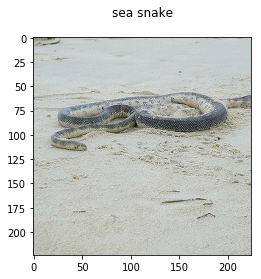

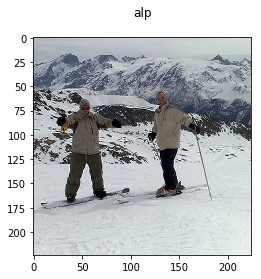

In [52]:

for i in range(2):
    plt.figure()
    plt.imshow(X_val[i] / 255.0)
    plt.title(keras_idx_to_name[Y_val[i]])
    plt.show()
    plt.close()

In [0]:
keras_idx_to_name = {}
f = open("/content/drive/My Drive/proposal/synset_words.txt","r")
idx = 0
for line in f:
    parts = line.split(" ")
    keras_idx_to_name[idx] = " ".join(parts[1:])
    idx += 1
f.close()

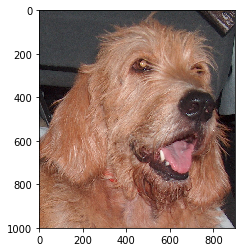

Input image shape: (1, 224, 224, 3)
40960/35363 [==================================] - 0s 2us/step
Predicted: [[('n02093991', 'Irish_terrier', 0.44871017), ('n02091635', 'otterhound', 0.43734002), ('n02090721', 'Irish_wolfhound', 0.019392757), ('n02094114', 'Norfolk_terrier', 0.01583692), ('n02094258', 'Norwich_terrier', 0.013806307)]]


In [56]:
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(X[78])
imgplot = plt.imshow(img)
plt.show()
img = image.load_img(X[78], target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
preds = vgg_model.predict(x)
y_predicted=decode_predictions(preds)
print('Predicted:', decode_predictions(preds))

In [57]:
Y_val

array([ 65, 970, 230, ..., 232, 982, 355])

In [0]:
b=keras_idx_to_name[Y_val[78]].split(",")

In [59]:
b[0]

'otterhound'

In [0]:
predicted_labels=[]
for i in range(len(X)):
  img = image.load_img(X[i], target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = vgg_model.predict(x)
  y_predicted=decode_predictions(preds)
  predicted_labels.append(y_predicted)

In [67]:
i=0
seperator = ' '
print((seperator.join(a)))

sea snake


In [69]:
a=list(predicted_labels[0][0][0])
a=a[1].split("_")
a=seperator.join(a)
a


'sea snake'

In [127]:
b=(keras_idx_to_name[Y_val[i]]).split("\n")

b[0]

'sea snake'

In [0]:
keras_idx_to_name

In [85]:
count=0
seperator=" "
for i in range(len(X)):
  a=list(predicted_labels[i][0][0])
  a=a[1].split("_")
  a=seperator.join(a)
  b=(keras_idx_to_name[Y_val[i]]).split("\n")
  if a==b[0]:
    count=count+1
  else:
    count=count
print(count)   


163


In [110]:
top_one_percent_acc=(count/len(X))*100
print("top_one_percent_accuracy:",top_one_percent_acc,"%")

top_one_percent_accuracy: 32.6 %


In [96]:
list(predicted_labels[78][0][:5])

[('n02093991', 'Irish_terrier', 0.44871017),
 ('n02091635', 'otterhound', 0.43734002),
 ('n02090721', 'Irish_wolfhound', 0.019392757),
 ('n02094114', 'Norfolk_terrier', 0.01583692),
 ('n02094258', 'Norwich_terrier', 0.013806307)]

In [108]:
count_for_top_five=0
for i in range(len(X)):
    b=(keras_idx_to_name[Y_val[i]]).split("\n")
    for j in range(5):
        a=list(predicted_labels[i][0][j])
        a=a[1].split("_")
        a=seperator.join(a)
        if (a==b[0]):
            count_for_top_five=count_for_top_five+1
print(count_for_top_five)            
top_five_percent_acc=(count_for_top_five/len(X))*100
print("top five percent accuracy:",top_five_percent_acc,"%")  

217
top five percent accuracy: 43.4 %


In [0]:
Top_five_percent_acc=[]
Top_one_percent_acc=[]
Top_one_percent_acc.append(top_one_percent_acc)
Top_five_percent_acc.append(top_five_percent_acc)